# Visualize, Evaluate and Compare Performance

## Table of Contents
- [1. Imports](#1-imports)
   - [1.1. Import Necessary Libraries](#11-import-necessary-libraries)
   - [1.2. Import Data](#12-import-data)
- [2. Visualizations](#2-visualizations)
   - [2.1. Average Best Fitness (per generation)](#21-average-best-fitness-(per-generation))
   - [2.2. Median Best Fitness (per generation)](#22-median-best-fitness-(per-generation))
   - [2.3. Best Fitness (per run)](#23-best-final-fitness-(per-run))
   - [2.4. Average Best Fitness of each mutation (per generation)](#24-average-best-fitness-of-each-mutation-(per-generation))
- [3. Metrics](#3-metrics)

## 1. Imports

### 1.1. Import Necessary Libraries

__`Step 1`__ Import necessary libraries.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

### 1.2. Import Data

__`Step 2`__ Import the data from our runs.

In [66]:
# Option 1:
df = pd.read_csv('combination_search/final_results.csv')

df

,Combination,Run,Generation,Fitness
0,"('block_rotation_mutation', 'cyclic_crossover'...",1,1,1.16667
1,"('block_rotation_mutation', 'cyclic_crossover'...",1,2,1.16667
2,"('block_rotation_mutation', 'cyclic_crossover'...",2,1,1.01143
3,"('block_rotation_mutation', 'cyclic_crossover'...",2,2,1.07796
4,"('block_rotation_mutation', 'cyclic_crossover'...",1,1,1.10181
5,"('block_rotation_mutation', 'cyclic_crossover'...",1,2,1.10181
6,"('block_rotation_mutation', 'cyclic_crossover'...",2,1,1.04867
7,"('block_rotation_mutation', 'cyclic_crossover'...",2,2,1.04867
8,"('block_rotation_mutation', 'custom_pmxo', 'to...",1,1,1.16733
9,"('block_rotation_mutation', 'custom_pmxo', 'to...",1,2,1.16733


## 2. Visualizations

### 2.1. Average Best Fitness (per generation)

__`Step 3`__ Calculate the average best fitness of each generation of each combination.

In [67]:
# Calculate the average best fitness for each genearation of each configuration
abf_by_config_gen = df.groupby(['Combination', 'Generation'])['Fitness'].mean().reset_index()

abf_by_config_gen.columns = ['Combination', 'Generation', 'Average_Best_Fitness']

abf_by_config_gen

,Combination,Generation,Average_Best_Fitness
0,"('block_rotation_mutation', 'custom_pmxo', 'fi...",1,1.163830
1,"('block_rotation_mutation', 'custom_pmxo', 'fi...",2,1.184165
2,"('block_rotation_mutation', 'custom_pmxo', 'to...",1,1.159450
3,"('block_rotation_mutation', 'custom_pmxo', 'to...",2,1.189310
4,"('block_rotation_mutation', 'cyclic_crossover'...",1,1.075240
5,"('block_rotation_mutation', 'cyclic_crossover'...",2,1.075240
6,"('block_rotation_mutation', 'cyclic_crossover'...",1,1.089050
7,"('block_rotation_mutation', 'cyclic_crossover'...",2,1.122315
8,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",1,1.145190
9,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",2,1.145550


__`Step 4`__ Plot the average best fitness of each generation of each combination.

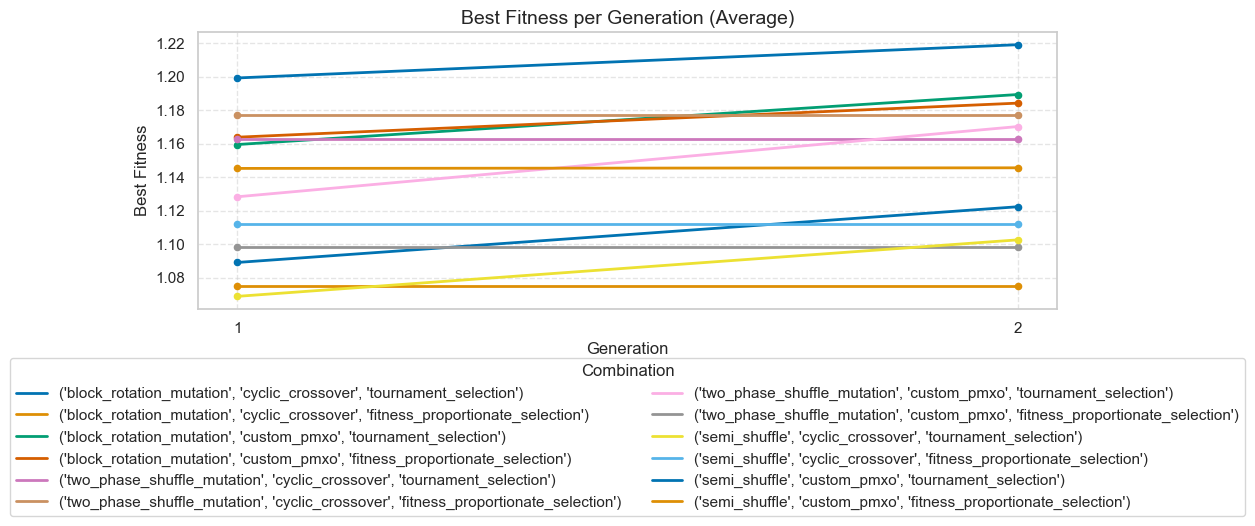

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Set the colors of the representations
palette = sns.color_palette("colorblind", n_configs)
color_map = dict(zip(config_order, palette))

# Plot the results
generation_order = sorted(df['Generation'].unique())

for config in config_order:
    config_med = abf_by_config_gen[abf_by_config_gen['Combination'] == config]
    x_vals = [i for i in range(len(generation_order))]
    y_vals = config_med['Average_Best_Fitness'].values

    plt.plot(
        x_vals,
        y_vals,
        linestyle='-',
        linewidth=2,
        color=color_map[config],
        label=f'{config}'
    )

    plt.scatter(
        x_vals,
        y_vals,
        color=color_map[config],        
        zorder=5,              
        s=20                  
    )

plt.title('Best Fitness per Generation (Average)', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best Fitness', fontsize=12)
plt.xticks(ticks=range(len(generation_order)), labels=generation_order)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(
    title='Combination',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,  
    frameon=True
)
plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()

### 2.2. Median Best Fitness (per generation)

__`Step 5`__ Calculate the median best fitness of each generation of each combination.

In [73]:
# Calculate the median fitness for each genearation of each configuration
mbf_by_config_gen = df.groupby(['Combination', 'Generation'])['Fitness'].median().reset_index()

mbf_by_config_gen.columns = ['Combination', 'Generation', 'Median_Best_Fitness']

mbf_by_config_gen

,Combination,Generation,Median_Best_Fitness
0,"('block_rotation_mutation', 'custom_pmxo', 'fi...",1,1.163830
1,"('block_rotation_mutation', 'custom_pmxo', 'fi...",2,1.184165
2,"('block_rotation_mutation', 'custom_pmxo', 'to...",1,1.159450
3,"('block_rotation_mutation', 'custom_pmxo', 'to...",2,1.189310
4,"('block_rotation_mutation', 'cyclic_crossover'...",1,1.075240
5,"('block_rotation_mutation', 'cyclic_crossover'...",2,1.075240
6,"('block_rotation_mutation', 'cyclic_crossover'...",1,1.089050
7,"('block_rotation_mutation', 'cyclic_crossover'...",2,1.122315
8,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",1,1.145190
9,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",2,1.145550


__`Step 6`__ Plot the median best fitness of each generation of each combination.

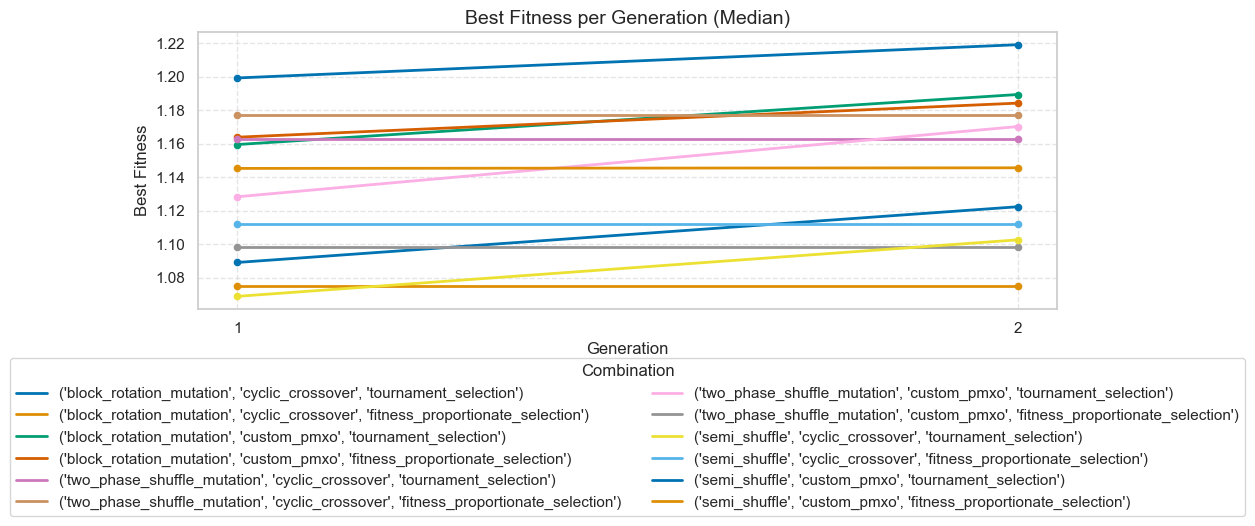

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Set the colors of the representations
palette = sns.color_palette("colorblind", n_configs)
color_map = dict(zip(config_order, palette))

# Plot the results
generation_order = sorted(df['Generation'].unique())

for config in config_order:
    config_med = mbf_by_config_gen[mbf_by_config_gen['Combination'] == config]
    x_vals = [i for i in range(len(generation_order))]
    y_vals = config_med['Median_Best_Fitness'].values 

    plt.plot(
        x_vals,
        y_vals,
        linestyle='-',
        linewidth=2,
        color=color_map[config],
        label=f'{config}'
    )

    plt.scatter(
        x_vals,
        y_vals,
        color=color_map[config],        
        zorder=5,              
        s=20                  
    )

plt.title('Best Fitness per Generation (Median)', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best Fitness', fontsize=12)
plt.xticks(ticks=range(len(generation_order)), labels=generation_order)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(
    title='Combination',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,  
    frameon=True
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### 2.3. Best Fitness (per run)

__`Step 7`__ Plot the best fitness of each run of each combination.

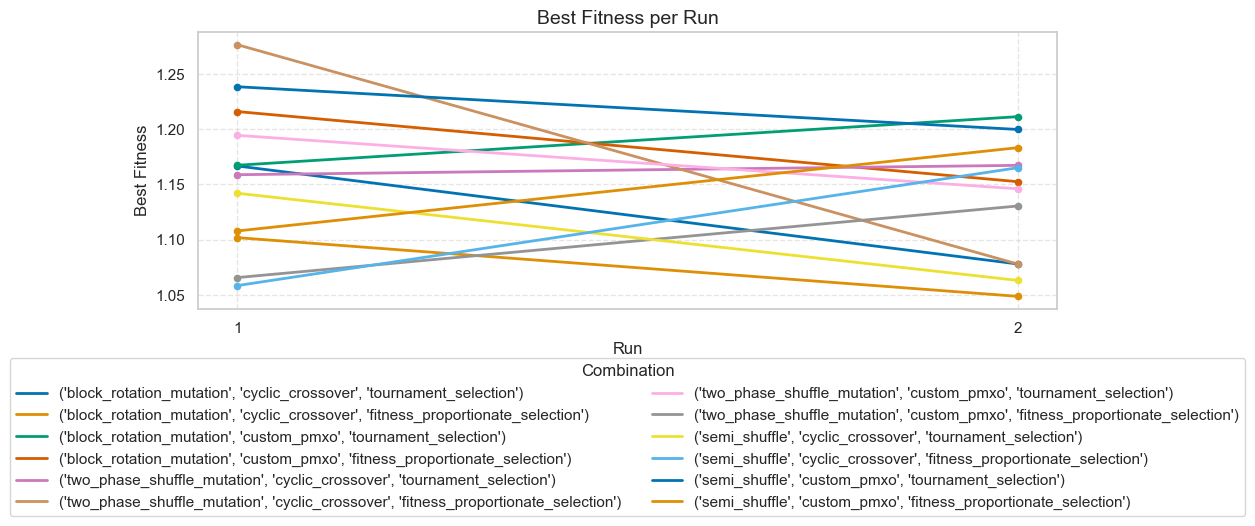

In [82]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Set the colors
palette = sns.color_palette("colorblind", n_configs)
color_map = dict(zip(config_order, palette))

# Compute maximum best fitness per run for each combination
max_best_per_run = df.groupby(['Combination', 'Run'])['Fitness'].max().reset_index()

# Get sorted run order
run_order = sorted(df['Run'].unique())

for config in config_order:
    config_data = max_best_per_run[max_best_per_run['Combination'] == config]
    x_vals = [i for i in range(len(run_order))]
    y_vals = config_data['Fitness'].values

    plt.plot(
        x_vals,
        y_vals,
        linestyle='-',
        linewidth=2,
        color=color_map[config],
        label=f'{config}'
    )

    plt.scatter(
        x_vals,
        y_vals,
        color=color_map[config],        
        zorder=5,              
        s=20                  
    )

plt.title('Best Fitness per Run', fontsize=14)
plt.xlabel('Run', fontsize=12)
plt.ylabel('Best Fitness', fontsize=12)
plt.xticks(ticks=range(len(run_order)), labels=run_order)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(
    title='Combination',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,  
    frameon=True
)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


### 2.4. Average Best Fitness of each mutation (per generation) 

In [ ]:
# A ideia é fazer um gráfico em que: 
#                                       - no eixo dos x temos as generations
#                                       - no eixo dos y temos a media das fitness de cada geração 
#                                       - cada linha representa uma combination em que a unica coisa que difere entre elas é ter uma prob the mutation diferente
# Como filtrar os dados para saber quais combinações têm qual probabilidade de mutation?
#                                       - sugestão: incluir as probabilidades tanto de crossover como de mutation no csv (prob_crossover e prob_mutation) 

#O que acham?

## 3. Metrics

__`Step 8`__ Calculate the average of the best fitnesses per run per combination, calculate the standard deviation and the relation between them.

In [94]:
df_metrics = deepcopy(df)

# Average best fitness per combination
ABF_comb = max_best_per_run.groupby('Combination')['Fitness'].mean().reset_index(name='ABF')
ABF_comb['std'] = max_best_per_run.groupby('Combination')['Fitness'].std().reset_index(drop=True)
ABF_comb ['ABF/std'] = ABF_comb['ABF'] / ABF_comb['std']
ABF_comb

,Combination,ABF,std,ABF/std
0,"('block_rotation_mutation', 'custom_pmxo', 'fi...",1.184165,0.044880,26.385099
1,"('block_rotation_mutation', 'custom_pmxo', 'to...",1.189310,0.031084,38.260654
2,"('block_rotation_mutation', 'cyclic_crossover'...",1.075240,0.037576,28.615337
3,"('block_rotation_mutation', 'cyclic_crossover'...",1.122315,0.062727,17.891930
4,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",1.145550,0.053302,21.491806
5,"('semi_shuffle', 'custom_pmxo', 'tournament_se...",1.219045,0.027344,44.582104
6,"('semi_shuffle', 'cyclic_crossover', 'fitness_...",1.111765,0.075427,14.739600
7,"('semi_shuffle', 'cyclic_crossover', 'tourname...",1.102550,0.055791,19.762245
8,"('two_phase_shuffle_mutation', 'custom_pmxo', ...",1.098070,0.045821,23.964591
9,"('two_phase_shuffle_mutation', 'custom_pmxo', ...",1.170190,0.034210,34.206254
